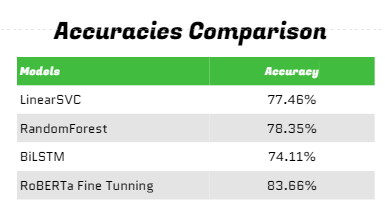

# **Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download("stopwords")
from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
#from imblearn.over_sampling import ADASYN,SMOTE
#from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import collections
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import RobustScaler
import xgboost
#from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from nltk import word_tokenize
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import xgboost
import numpy as np

#from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from xgboost import XGBClassifier as xg
from lightgbm import LGBMClassifier as lg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

nltk.download("wordnet")
import re
import os
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Dense,Flatten,Conv2D,Conv1D,GlobalMaxPooling1D,GlobalMaxPool1D
from keras.optimizers import Adam
import numpy as np  
import pandas as pd 
import keras.backend as k
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional,GRU
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# **Confusion Matrix Function**

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# **ROC Curve Function**

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
 #   preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, probs)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
 #   y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, probs)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
#!pip install app_store_scraper
from app_store_scraper import AppStore
from pprint import pprint

sysk = AppStore(country="nz", app_name="facebook")
sysk.review(how_many=4000)

pprint(sysk.reviews)
pprint(sysk.reviews_count)

2021-04-19 10:42:36,606 [INFO] Base - Searching for app id
2021-04-19 10:42:39,242 [INFO] Base - Initialised: AppStore('nz', 'facebook', 284882215)
2021-04-19 10:42:39,244 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/nz/app/facebook/id284882215
2021-04-19 10:42:44,334 [INFO] Base - [id:284882215] Fetched 920 reviews (920 fetched in total)
2021-04-19 10:42:49,519 [INFO] Base - [id:284882215] Fetched 1580 reviews (1580 fetched in total)
2021-04-19 10:42:54,834 [INFO] Base - [id:284882215] Fetched 2260 reviews (2260 fetched in total)
2021-04-19 10:43:00,087 [INFO] Base - [id:284882215] Fetched 2900 reviews (2900 fetched in total)
2021-04-19 10:43:19,835 [ERROR] Base - Something went wrong: HTTPSConnectionPool(host='amp-api.apps.apple.com', port=443): Max retries exceeded with url: /v1/catalog/nz/apps/284882215/reviews?l=en-GB&offset=3060&limit=20&platform=web&additionalPlatforms=appletv%2Cipad%2Ciphone%2Cmac (Caused by ResponseError('too many 429 error responses'))
20

Streaming output truncated to the last 5000 lines.
  'isEdited': False,
  'rating': 3,
  'review': 'App looks fine. It used to be a lot better in the earlier '
            'versions, now all we have is bugs in notifications, comments, '
            'very slow at times...make my life easier pls:-)',
  'title': 'Not there yet!',
  'userName': 'SupiJi'},
 {'date': datetime.datetime(2010, 12, 6, 21, 51, 7),
  'isEdited': False,
  'rating': 3,
  'review': 'It would be good if the places feature worked and also the '
            'ability to watch the movies that are uploaded straight to '
            'Facebook',
  'title': 'Working features',
  'userName': 'Toby Gray'},
 {'date': datetime.datetime(2011, 6, 22, 12, 44, 43),
  'isEdited': False,
  'rating': 1,
  'review': "Since last version it's been awful, constantly getting "
            'notifications for messages and FB notification that happened days '
            'ago. "John likes your photo".... I know it was a week ago, and '
        

In [ ]:
dataset = pd.DataFrame.from_dict(sysk.reviews)
dataset

,isEdited,rating,title,userName,review,date
0,False,3,Faulty algorithms,AN2Felllla,The main reason I use Facebook is for the invi...,2019-09-28 23:18:55
1,False,4,Login error,vestaltingz,Okay its really really annoying now because I’...,2020-05-18 00:31:09
2,False,1,Login error - please try again,Anon0x,"*****I left my original review April 1st, it i...",2019-12-13 09:09:13
3,False,1,Not amazing.,Hello it's Kika,Facebook makes it difficult for updating your ...,2019-08-04 14:38:48
4,False,3,Censorship now abounds,Pitch quiz,I’ve been using Facebook for over 10 years. In...,2019-07-11 23:58:29
...,...,...,...,...,...,...
3055,False,1,Facebook could be so good!!,Janajnahananjana,"It will not stop quitting out, I can barely be...",2014-09-10 09:21:00
3056,False,1,Stupid,msayemtee,This app used to be good but now it's a hot me...,2014-08-31 09:48:30
3057,False,2,No Facebook?,Qsaderman,For some odd reason since the update my Facebo...,2014-08-29 10:30:09
3058,False,3,Ugh,AotearoaAmy,It would help if the Most Recent option actual...,2013-07-17 13:50:19


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



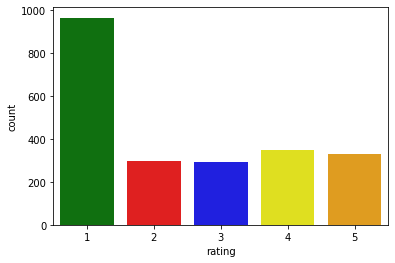

1    966
4    351
5    330
2    298
3    295
Name: rating, dtype: int64


In [ ]:
sns.countplot(dataset["rating"], palette = ["green","red",'blue','yellow','orange'])
plt.show()
print(dataset.rating.value_counts())

# **Convert Multiclass dataset to Binary class Dataset**

In [ ]:

t=dataset['rating']


In [ ]:
#y = pd.get_dummies(t, prefix='Country')
#print(y.head())

In [ ]:

train_li=[]
for i in range(len(t)):
    if ((t[i]==1)|(t[i]==2) ):
        train_li.append(0)
    else:
        train_li.append(1)
dataset['Binary']=train_li
dataset.head()

,isEdited,rating,title,userName,review,date,Binary
0,False,3,Faulty algorithms,AN2Felllla,The main reason I use Facebook is for the invi...,2019-09-28 23:18:55,1
1,False,4,Login error,vestaltingz,Okay its really really annoying now because I’...,2020-05-18 00:31:09,1
2,False,1,Login error - please try again,Anon0x,"*****I left my original review April 1st, it i...",2019-12-13 09:09:13,0
3,False,1,Not amazing.,Hello it's Kika,Facebook makes it difficult for updating your ...,2019-08-04 14:38:48,0
4,False,3,Censorship now abounds,Pitch quiz,I’ve been using Facebook for over 10 years. In...,2019-07-11 23:58:29,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



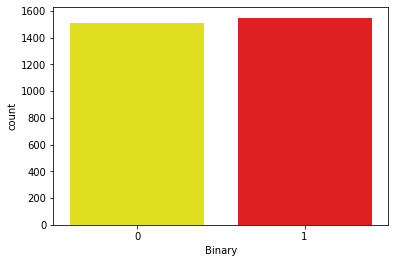

1    1107
4     568
5     528
3     453
2     404
Name: rating, dtype: int64


In [ ]:
sns.countplot(dataset["Binary"], palette = ["yellow","red"])
plt.show()
print(dataset.rating.value_counts())

# **1. LinearSVC**

In [ ]:
x=dataset['review']
y=dataset['Binary']

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,2))
x_train_trans=cv.fit_transform(x_train)

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
model2 =( LinearSVC())
model2.fit(x_train_trans,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.metrics import classification_report

predictions=model2.predict(cv.transform(x_test))
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       252
           1       0.78      0.67      0.72       196

    accuracy                           0.77       448
   macro avg       0.78      0.76      0.77       448
weighted avg       0.78      0.77      0.77       448



AUC: 0.7633
Accuracy: 77.46%


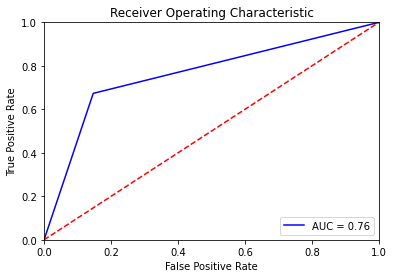

In [ ]:
evaluate_roc(predictions, y_test)


[[215  37]
 [ 64 132]]
Confusion matrix, without normalization
[[215  37]
 [ 64 132]]


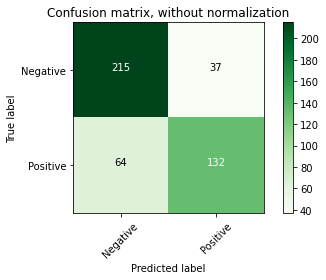

In [ ]:

y=list(y_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,predictions)
print(cm)
cnf_matrix = confusion_matrix(y, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],
                      title='Confusion matrix, without normalization')

# **2. RandomForest** 

In [ ]:
x=dataset['review']
y=dataset['Binary']

In [ ]:
import re
processed_features = []
for sentence in range(0, len(x)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(x[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, y, test_size=0.2, random_state=0)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = text_classifier.predict(X_test)
#print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       252
           1       0.78      0.71      0.74       196

    accuracy                           0.78       448
   macro avg       0.78      0.78      0.78       448
weighted avg       0.78      0.78      0.78       448

0.7834821428571429


AUC: 0.7752
Accuracy: 78.35%


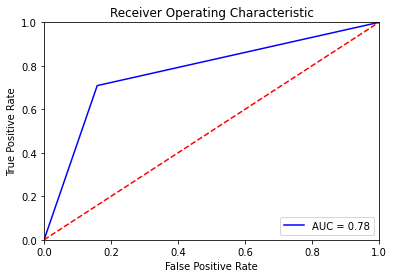

In [ ]:
evaluate_roc(predictions, y_test)


[[212  40]
 [ 57 139]]
Confusion matrix, without normalization
[[212  40]
 [ 57 139]]


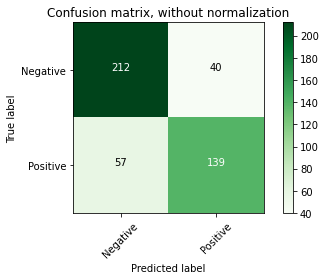

In [ ]:

y=list(y_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,predictions)
print(cm)
cnf_matrix = confusion_matrix(y, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],
                      title='Confusion matrix, without normalization')

# **3. LSTM**

In [ ]:
x=dataset['review']
y=dataset['Binary']

In [ ]:

max_features = 6000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x)
list_tokenized_train = tokenizer.texts_to_sequences(x)

maxlen = 512
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = y
x_train,x_test,y_train,y_test=train_test_split(X_t,y,test_size=0.2,random_state=42)

embed_size = 128

from tensorflow.keras import layers
model=Sequential()
model.add(Embedding(max_features,embed_size,input_length=maxlen))
#model.add(Embedding(max_features,embed_size,input_length=maxlen))
model.add(layers.Bidirectional(layers.LSTM(256, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="simple_model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)
model.fit(x=x_train,y=y_train, batch_size=16, epochs=1, validation_data=(x_test,y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 512, 128)          768000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 512, 512)          788480    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               656384    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                4112      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 2,216,993
Trainable params: 2,216,993
Non-trainable params: 0
_________________________________________________________________
112/112 [==============================] - 59s 479ms/step - loss: 0.6485 - accuracy: 0.6078 - val_loss: 0.5433

[[172  75]
 [ 41 160]]
Confusion matrix, without normalization
[[172  75]
 [ 41 160]]


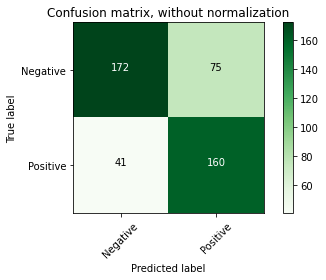

In [ ]:
pred=model.predict(x_test)
p=[]
pr=[]
y=list(y_test)
for i in range(0,len(pred)):
  if pred[i]<0.5:
    pr.append(0)
  else:
    pr.append(1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,pr)
print(cm)
cnf_matrix = confusion_matrix(y, pr)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],
                      title='Confusion matrix, without normalization')

AUC: 0.7462
Accuracy: 74.11%


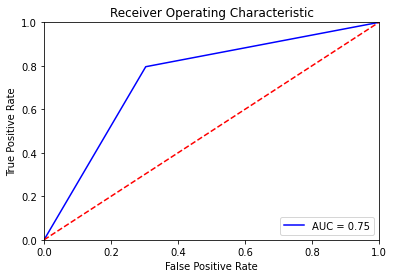

In [ ]:
evaluate_roc(pr, y)


# **4. RoBERTa Fine-tunning**

In [ ]:
!pip install transformers
#from transformers import BertTokenizer, TFBertForSequenceClassification,RobertaTokenizer
from transformers import InputExample, InputFeatures
#from transformers import BertTokenizer, TFRobertaForSequenceClassification,RobertaTokenizer
from transformers import  TFRobertaForSequenceClassification,RobertaTokenizer



     |████████████████████████████████| 2.1MB 7.9MB/s 
     |████████████████████████████████| 3.3MB 54.7MB/s 
     |████████████████████████████████| 901kB 57.5MB/s 


In [ ]:
#model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
model = TFRobertaForSequenceClassification.from_pretrained("roberta-large")
#tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
#!pip install tensorflow==2.0.0

!pip install bert-for-tf2

!pip install sentencepiece

2021-04-19 10:43:37,874 [INFO] filelock - Lock 140301637033616 acquired on /root/.cache/huggingface/transformers/dea67b44b38d504f2523f3ddb6acb601b23d67bee52c942da336fa1283100990.94cae8b3a8dbab1d59b9d4827f7ce79e73124efa6bb970412cd503383a95f373.lock


2021-04-19 10:43:38,265 [INFO] filelock - Lock 140301637033616 released on /root/.cache/huggingface/transformers/dea67b44b38d504f2523f3ddb6acb601b23d67bee52c942da336fa1283100990.94cae8b3a8dbab1d59b9d4827f7ce79e73124efa6bb970412cd503383a95f373.lock


2021-04-19 10:43:38,473 [INFO] filelock - Lock 140300275277456 acquired on /root/.cache/huggingface/transformers/5085800125ab85a60f2ae6e70e0325148372c8da141c61b52c319583425f86f2.f29d268c3f2660b8445030c99c834c4e6f8ddb9e95023b7f9ff0fd7ecdb37d75.h5.lock


2021-04-19 10:44:07,373 [INFO] filelock - Lock 140300275277456 released on /root/.cache/huggingface/transformers/5085800125ab85a60f2ae6e70e0325148372c8da141c61b52c319583425f86f2.f29d268c3f2660b8445030c99c834c4e6f8ddb9e95023b7f9ff0fd7ecdb37d75.h5.lock


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


     |████████████████████████████████| 51kB 5.4MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-cp37-none-any.whl size=30535 sha256=6a18f5742ca3ffbb1bdb5c695a56e3bf7c944f14b8ed2217c05cab27b9d2883c
  Stored in directory: /root/.cache/pip/wheels/a1/04/ee/347bd9f5b821b637c76411d280271a857aece00358896a230f
  Created wheel for py-params: filename=py_params-0.10.2-cp37-none-any.whl size=7912 sha256=9fc6393bc1e38b12770e7327ccf44cf1ee93f01e9c466705a94b6f374c7fa6f8
  Stored in directory: /root/.cache/pip/wheels/d0/4a/70/ff12450229ff1955abf01f365051d4faae1c20aef53ab4cf09
  Created wheel for params-flow: filename=params_flow-0.8.2-cp37-none-any.whl size=19472 sha256=4f0e42b6181f195e6c98054303cc4f23b6b5155624d1d22829d1de9f234a6cb5
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow
     |████████████████████████████████| 1.2MB 8.7MB/s 


In [ ]:
from fastai.text import *
class FastAiRobertaTokenizer(BaseTokenizer):
    """Wrapper around RobertaTokenizer to be compatible with fastai"""
    def __init__(self, tokenizer: RobertaTokenizer, max_seq_len: int=128, **kwargs): 
        self._pretrained_tokenizer = tokenizer
        self.max_seq_len = max_seq_len 
    def __call__(self, *args, **kwargs): 
        return self 
    def tokenizer(self, t:str) -> List[str]: 
        """Adds Roberta bos and eos tokens and limits the maximum sequence length""" 
        return [config.start_tok] + self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2] + [config.end_tok]

In [ ]:
dataset

,userName,rating,date,title,isEdited,review,Binary
0,AN2Felllla,3,2019-09-28 23:18:55,Faulty algorithms,False,The main reason I use Facebook is for the invi...,1
1,vestaltingz,4,2020-05-18 00:31:09,Login error,False,Okay its really really annoying now because I’...,1
2,Anon0x,1,2019-12-13 09:09:13,Login error - please try again,False,"*****I left my original review April 1st, it i...",0
3,Hello it's Kika,1,2019-08-04 14:38:48,Not amazing.,False,Facebook makes it difficult for updating your ...,0
4,Pitch quiz,3,2019-07-11 23:58:29,Censorship now abounds,False,I’ve been using Facebook for over 10 years. In...,1
...,...,...,...,...,...,...,...
2235,Higz08,1,2014-03-11 05:32:41,Facebook playing up BIG TIME,False,Since i have updated to the lastest update for...,0
2236,J-Jess,2,2014-02-26 05:36:28,Last update ruined it,False,I have used this app for a long time and since...,0
2237,Chunk275,1,2014-01-12 18:00:28,Crashing!!!,False,Had the app installed for a while. Just only y...,0
2238,jcroberts111,1,2013-10-08 03:02:45,Difficult navigation,False,"Ever since the application update, I have foun...",0


In [ ]:
! pip install pytorch-transformers
from pytorch_transformers import RobertaModel


     |████████████████████████████████| 184kB 8.0MB/s 
     |████████████████████████████████| 133kB 15.5MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 7.4MB 13.7MB/s 
ERROR: botocore 1.20.53 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


2021-04-19 10:44:34,550 [INFO] pytorch_transformers.modeling_bert - Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .
2021-04-19 10:44:34,557 [INFO] pytorch_transformers.modeling_xlnet - Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .


In [ ]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [ ]:
feat_cols = "review"
label_cols = "Binary"
df=pd.DataFrame(dataset)

model = TFRobertaForSequenceClassification.from_pretrained("roberta-large")
class Config(dict):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        for k, v in kwargs.items():
            setattr(self, k, v)
    
    def set(self, key, val):
        self[key] = val
        setattr(self, key, val)
        
config = Config(
    testing=False,
    seed = 2019,
    roberta_model_name='roberta-large', # can also be exchnaged with roberta-large 
    max_lr=1e-5,
    epochs=1,
    use_fp16=False,
    bs=4, 
    max_seq_len=256, 
    num_labels = 2,
    hidden_dropout_prob=.05,
    hidden_size=1024, # 1024 for roberta-large
    start_tok = "<s>",
    end_tok = "</s>",
)
# create fastai tokenizer for roberta
roberta_tok = RobertaTokenizer.from_pretrained("roberta-large")

fastai_tokenizer = Tokenizer(tok_func=FastAiRobertaTokenizer(roberta_tok, max_seq_len=config.max_seq_len), 
                             pre_rules=[], post_rules=[])
# create fastai vocabulary for roberta
path = Path()
roberta_tok.save_vocabulary(path)

with open('vocab.json', 'r') as f:
    roberta_vocab_dict = json.load(f)
    
fastai_roberta_vocab = Vocab(list(roberta_vocab_dict.keys()))

# Setting up pre-processors
class RobertaTokenizeProcessor(TokenizeProcessor):
    def __init__(self, tokenizer):
         super().__init__(tokenizer=tokenizer, include_bos=False, include_eos=False)

class RobertaNumericalizeProcessor(NumericalizeProcessor):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, vocab=fastai_roberta_vocab, **kwargs)


def get_roberta_processor(tokenizer:Tokenizer=None, vocab:Vocab=None):
    """
    Constructing preprocessors for Roberta
    We remove sos and eos tokens since we add that ourselves in the tokenizer.
    We also use a custom vocabulary to match the numericalization with the original Roberta model.
    """
    return [RobertaTokenizeProcessor(tokenizer=tokenizer), NumericalizeProcessor(vocab=vocab)]
# Creating a Roberta specific DataBunch class
class RobertaDataBunch(TextDataBunch):
    "Create a `TextDataBunch` suitable for training Roberta"
    @classmethod
    def create(cls, train_ds, valid_ds, test_ds=None, path:PathOrStr='.', bs:int=4, val_bs:int=None, pad_idx=1,
               pad_first=True, device:torch.device=None, no_check:bool=False, backwards:bool=False, 
               dl_tfms:Optional[Collection[Callable]]=None, **dl_kwargs) -> DataBunch:
        "Function that transform the `datasets` in a `DataBunch` for classification. Passes `**dl_kwargs` on to `DataLoader()`"
        datasets = cls._init_ds(train_ds, valid_ds, test_ds)
        val_bs = ifnone(val_bs, bs)
        collate_fn = partial(pad_collate, pad_idx=pad_idx, pad_first=pad_first, backwards=backwards)
        train_sampler = SortishSampler(datasets[0].x, key=lambda t: len(datasets[0][t][0].data), bs=bs)
        train_dl = DataLoader(datasets[0], batch_size=bs, sampler=train_sampler, drop_last=True, **dl_kwargs)
        dataloaders = [train_dl]
        for ds in datasets[1:]:
            lengths = [len(t) for t in ds.x.items]
            sampler = SortSampler(ds.x, key=lengths.__getitem__)
            dataloaders.append(DataLoader(ds, batch_size=val_bs, sampler=sampler, **dl_kwargs))
        return cls(*dataloaders, path=path, device=device, dl_tfms=dl_tfms, collate_fn=collate_fn, no_check=no_check)

class RobertaTextList(TextList):
    _bunch = RobertaDataBunch
    _label_cls = TextList
# loading the tokenizer and vocab processors
processor = get_roberta_processor(tokenizer=fastai_tokenizer, vocab=fastai_roberta_vocab)

# creating our databunch 
data = RobertaTextList.from_df(df, ".", cols=feat_cols, processor=processor) \
    .split_by_rand_pct(seed=config.seed) \
    .label_from_df(cols=label_cols,label_cls=CategoryList) \
    .databunch(bs=config.bs, pad_first=False, pad_idx=0)
import torch
import torch.nn as nn
from pytorch_transformers import RobertaModel

# defining our model architecture 
class CustomRobertaModel(nn.Module):
    def __init__(self,num_labels=2):
        super(CustomRobertaModel,self).__init__()
        self.num_labels = num_labels
        self.roberta = RobertaModel.from_pretrained(config.roberta_model_name)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, num_labels) # defining final output layer
        
    def forward(self, input_ids, token_type_ids=None, attention_mask=None, labels=None):
        _ , pooled_output = self.roberta(input_ids, token_type_ids, attention_mask) # 
        logits = self.classifier(pooled_output)        
        return logits
roberta_model = CustomRobertaModel()

learn = Learner(data, roberta_model, metrics=[accuracy])

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2021-04-19 10:50:05,527 [INFO] numexpr.utils - NumExpr defaulting to 2 threads.


/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



2021-04-19 10:50:07,542 [INFO] pytorch_transformers.file_utils - https://s3.amazonaws.com/models.huggingface.co/bert/roberta-large-config.json not found in cache or force_download set to True, downloading to /tmp/tmpky9irqo4
100%|██████████| 482/482 [00:00<00:00, 215781.25B/s]
2021-04-19 10:50:07,849 [INFO] pytorch_transformers.file_utils - copying /tmp/tmpky9irqo4 to cache at /root/.cache/torch/pytorch_transformers/c22e0b5bbb7c0cb93a87a2ae01263ae715b4c18d692b1740ce72cacaa99ad184.2d28da311092e99a05f9ee17520204614d60b0bfdb32f8a75644df7737b6a748
2021-04-19 10:50:07,851 [INFO] pytorch_transformers.file_utils - creating metadata file for /root/.cache/torch/pytorch_transformers/c22e0b5bbb7c0cb93a87a2ae01263ae715b4c18d692b1740ce72cacaa99ad184.2d28da311092e99a05f9ee17520204614d60b0bfdb32f8a75644df7737b6a748
2021-04-19 10:50:07,853 [INFO] pytorch_transformers.file_utils - removing temp file /tmp/tmpky9irqo4
2021-04-19 10:50:07,855 [INFO] pytorch_transformers.modeling_utils - loading configurat

In [ ]:
learn.model.roberta.train() # setting roberta to train as it is in eval mode by default
learn.fit_one_cycle(config.epochs, max_lr=config.max_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.384191,0.390406,0.836601,03:10


In [ ]:
def get_preds_as_nparray(ds_type) -> np.ndarray:
    learn.model.roberta.eval()
    preds = learn.get_preds(ds_type)[0].detach().cpu().numpy()
    sampler = [i for i in data.dl(ds_type).sampler]
    reverse_sampler = np.argsort(sampler)
    ordered_preds = preds[reverse_sampler, :]
    pred_values = np.argmax(ordered_preds, axis=1)
    return ordered_preds, pred_values

In [ ]:
preds, pred_values = get_preds_as_nparray(DatasetType.Valid)
# accuracy on valid
(pred_values == data.valid_ds.y.items).mean()

0.8366013071895425

In [ ]:
pred_values=torch.as_tensor(pred_values)
y_true=torch.as_tensor( data.valid_ds.y.items)

In [ ]:
y_true

AUC: 0.8410
Accuracy: 83.66%


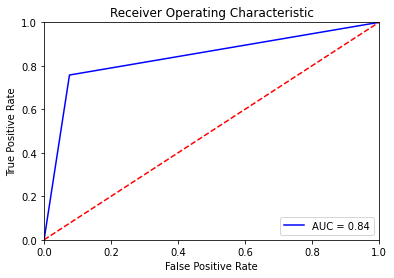

In [ ]:
evaluate_roc(pred_values, y_true)


Confusion matrix, without normalization
[[268  22]
 [ 78 244]]


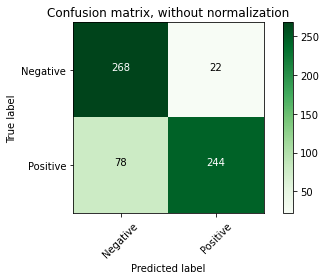

In [ ]:


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(data.valid_ds.y.items,pred_values)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['Negative','Positive'],
                      title='Confusion matrix, without normalization')